&copy;  C. Lázaro, Universidad Politécnica de Valencia, 2015

# Form finding of planar flexible rods (2)

In the previous notebook we have developed a tool which finds the form of the homogeneous elastica given the following prescribed parameters:  

1. Material parameter: The bending stiffness $EI$  
2. Static parameters:  
    2.1. Total energy in the rod $\mathcal{H}$ (invariant)  
    2.2. Magnitude of the resultant section force $F$ (invariant)


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 1 Effect of the variation of the static parameters

Let's experiment the effect of manipulating the static parameters. For that purpose we will transform some snippets of code into python functions

In [2]:
def getOrbitPoints(EI, H, F, nVertex):
    if (abs(F) <= H)|(abs(F) < 1.E-8):
        theta0 = np.pi
    else:
        theta0 = np.arccos(H/F)
    theta = np.linspace(theta0, -theta0, nVertex)
        
    N = F*np.cos(theta)
    Q = -F*np.sin(theta)
    M = np.zeros(nVertex)
    for i in range(nVertex):
        if (abs(H-N[i]) < 1E-8):
            M[i] = 0.
        else:
            M[i] = -np.sqrt(2*EI*(H - N[i]))
    
    return theta0, N, Q, M

In [3]:
def computeElastica(theta0, Q, M, nEdges, nVertex):
    h = np.zeros(nEdges)
    h[:] = -2*(M[1:] - M[0:-1])/(Q[0:-1] + Q[1:])
    length =np.sum(h)

    kappa = M / EI
    phi = np.zeros(nVertex-1)
    rotor = np.zeros(nVertex-1) + 1j*np.zeros(nVertex-1)

    phi[0] = theta0 + np.arctan(h[0]*kappa[0]/2)
    phi[1:] = 2.*np.arctan(kappa[1:-1]*(h[0:-1] + h[1:])/4.) 

    rotor[0] = np.exp(1j*phi[0])
    rotor[1:] = (4./(h[0:-1] + h[1:]) + 1j*kappa[1:-1])/(4./(h[0:-1] + h[1:]) - 1j * kappa[1:-1])
    
    gamma = np.zeros(nVertex) + 1j*np.zeros(nVertex)
    gamma[0] = 0.+0j
    gamma[1] = gamma[0] + h[0]*rotor[0]
    for n in range(1, nVertex-1):
        gamma[n+1] = gamma[n] + h[n]/h[n-1] * (gamma[n] - gamma[n-1]) * rotor[n]
    
    return phi[0], length, gamma

### 1.1 Constant energy $\mathcal{H}$, varying force magnitude $F$

In [4]:
EI = 5000.   #kN m^2

H = 5000.    #kN m/m
F = np.arange(-5500., -10500., -500.)    #kN

nEdges = 500
nVertex = nEdges + 1

N = np.zeros((len(F), nVertex))
Q = np.zeros((len(F), nVertex))
M = np.zeros((len(F), nVertex))
th0 = np.zeros(len(F))
length = []
gamma = []
for i in range(len(F)):
    (th0[i], N[i], Q[i], M[i]) = getOrbitPoints(EI, H, F[i], nVertex)
    (ph0, l, g) = computeElastica(th0[i], Q[i], M[i], nEdges, nVertex)
    length.append(l)
    gamma.append(g)

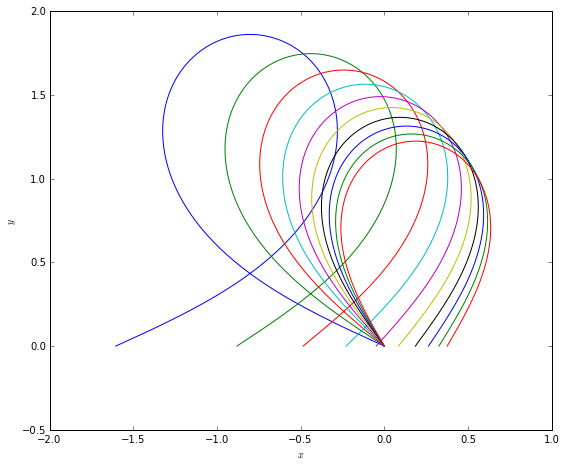

In [5]:
fig = plt.figure(figsize=(9,9))

ax = fig.gca(aspect='equal')
for i in range(len(F)):
    ax.plot(gamma[i].real, gamma[i].imag)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

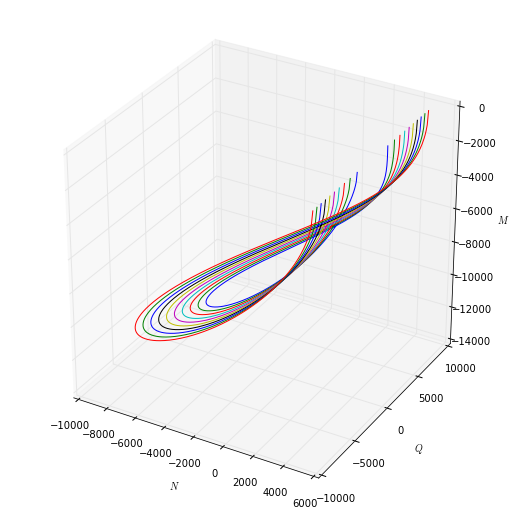

In [6]:
fig = plt.figure(figsize=(9,9))

ax = fig.gca(projection='3d')
for i in range(len(F)):
    ax.plot(N[i], Q[i], M[i])

ax.set_xlabel('$N$')
ax.set_ylabel('$Q$')
ax.set_zlabel('$M$')

### 1.2 Constant magnitude $F$, varying energy $\mathcal{H}$

#### 1.2.1 $\mathcal{H} < |F|$

In [7]:
EI = 5000.   #kN m^2

H = np.arange(-4500., 4500., 500.)   #kN m/m
F = -5000.    #kN

nEdges = 5000
nVertex = nEdges + 1

N = np.zeros((len(H), nVertex))
Q = np.zeros((len(H), nVertex))
M = np.zeros((len(H), nVertex))
th0 = np.zeros(len(H))
length = []
gamma = []
for i in range(len(H)):
    (th0[i], N[i], Q[i], M[i]) = getOrbitPoints(EI, H[i], F, nVertex)
    (ph0, l, g) = computeElastica(th0[i], Q[i], M[i], nEdges, nVertex)
    length.append(l)
    gamma.append(g)

In [8]:
print(length)

[3.1820113758836253, 3.2248869023295215, 3.270517373966634, 3.3192507733784029, 3.3715039074092914, 3.4277816614269567, 3.4887034604979732, 3.5550404279404657, 3.6277688742273524, 3.7081495383056389, 3.7978490132831109, 3.8991334661726671, 4.0151932080076147, 4.1507206443883993, 4.3130228827630113, 4.5143981925513605, 4.7780140552968069, 5.1561532259706251]


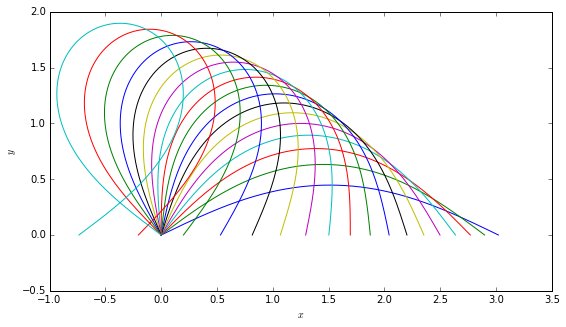

In [9]:
fig = plt.figure(figsize=(9,9))

ax = fig.gca(aspect='equal')
for i in range(len(H)):
    ax.plot(gamma[i].real, gamma[i].imag)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

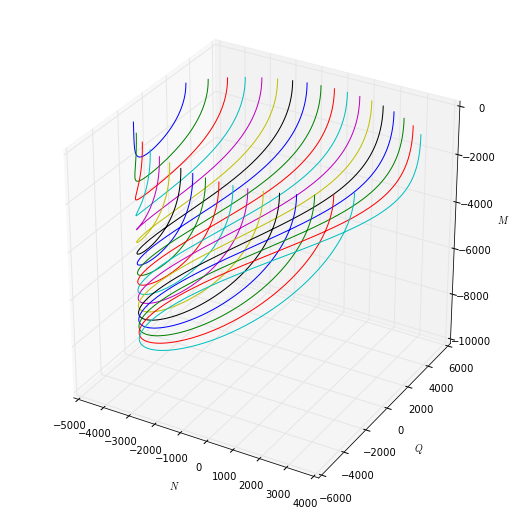

In [10]:
fig = plt.figure(figsize=(9,9))

ax = fig.gca(projection='3d')
for i in range(len(H)):
    ax.plot(N[i], Q[i], M[i])

ax.set_xlabel('$N$')
ax.set_ylabel('$Q$')
ax.set_zlabel('$M$')

#### 1.2.2 $\mathcal{H} > |F|$

In [11]:
EI = 5000.   #kN m^2

H = np.arange(5500., 23500., 1000.)   #kN m/m 
F = -5000.    #kN

nEdges = 5000
nVertex = nEdges + 1

N = np.zeros((len(H), nVertex))
Q = np.zeros((len(H), nVertex))
M = np.zeros((len(H), nVertex))
th0 = np.zeros(len(H))
length = []
gamma = []
for i in range(len(H)):
    (th0[i], N[i], Q[i], M[i]) = getOrbitPoints(EI, H[i], F, nVertex)
    (ph0, l, g) = computeElastica(th0[i], Q[i], M[i], nEdges, nVertex)
    length.append(l)
    gamma.append(g)

In [12]:
print(length)

[5.7223853791570161, 4.576333414113634, 4.0378120208577073, 3.6840594658098125, 3.4221240401527098, 3.2154514569230699, 3.0457531387805705, 2.902525096031952, 2.779163124372932, 2.6712398455618036, 2.5756414211566354, 2.4900947507171329, 2.4128903010062195, 2.3427106397492139, 2.2785196287066496, 2.2194881808111684, 2.1649429783507905, 2.1143301181815963]


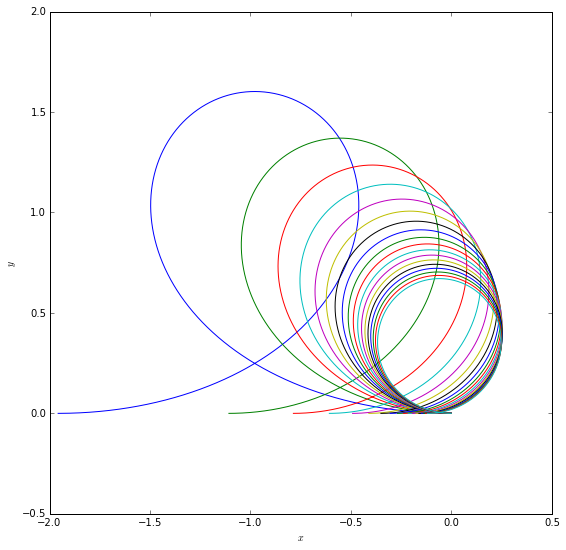

In [13]:
fig = plt.figure(figsize=(9,9))

ax = fig.gca(aspect='equal')
for i in range(len(H)):
    ax.plot(gamma[i].real, gamma[i].imag)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

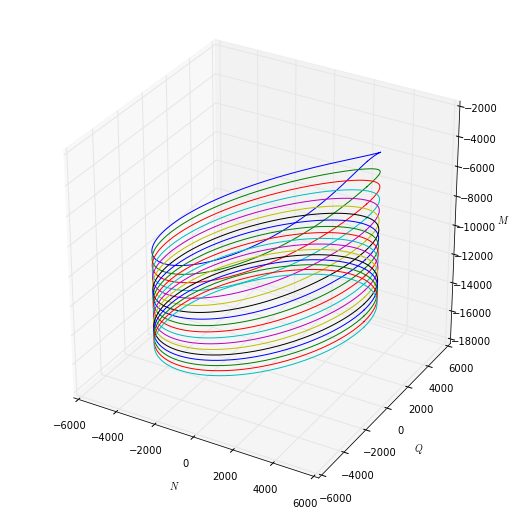

In [14]:
fig = plt.figure(figsize=(9,9))

ax = fig.gca(projection='3d')
for i in range(len(H)):
    ax.plot(N[i], Q[i], M[i])

ax.set_xlabel('$N$')
ax.set_ylabel('$Q$')
ax.set_zlabel('$M$')

## 2. Relation between total energy, force and end node distance

### 2.1 Constant $F$

Let's establish now, for given $EI$ and $F$ the relation between the total energy and the (signed) distance between end nodes

In [15]:
EI = 5000.   #kN m^2

Hinf = np.arange(-4950., 4950., 50.)   #kN m/m
Hsup = np.arange(5050., 14950., 50)
F = -5000.    #kN

nEdges = 5000
nVertex = nEdges + 1

Ni = np.zeros((len(Hinf), nVertex))
Qi = np.zeros((len(Hinf), nVertex))
Mi = np.zeros((len(Hinf), nVertex))
th0i = np.zeros(len(Hinf))
ph0i = []
gammaInf = []
for i in range(len(Hinf)):
    (th0i[i], Ni[i], Qi[i], Mi[i]) = getOrbitPoints(EI, Hinf[i], F, nVertex)
    (ph0, l, g) = computeElastica(th0i[i], Qi[i], Mi[i], nEdges, nVertex)
    gammaInf.append(g)
    ph0i.append(ph0)
    
Ns = np.zeros((len(Hsup), nVertex))
Qs = np.zeros((len(Hsup), nVertex))
Ms = np.zeros((len(Hsup), nVertex))
th0s = np.zeros(len(Hsup))
ph0s = []
gammaSup = []
for i in range(len(Hsup)):
    (th0s[i], Ns[i], Qs[i], Ms[i]) = getOrbitPoints(EI, Hsup[i], F, nVertex)
    (ph0, l, g) = computeElastica(th0s[i], Qs[i], Ms[i], nEdges, nVertex)
    gammaSup.append(g)
    ph0s.append(ph0)

In [16]:
distInf = np.zeros(len(Hinf))
for i in range(len(Hinf)):
    distInf[i] = gammaInf[i][nVertex-1].real

distSup = np.zeros(len(Hsup))
for i in range(len(Hsup)):
    distSup[i] = gammaSup[i][nVertex-1].real

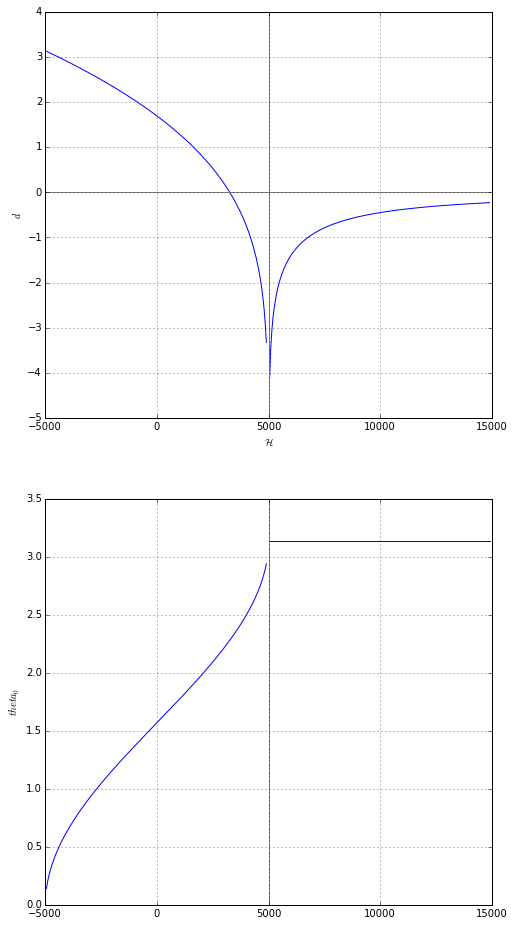

In [17]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 16))

#ax = fig.gca()
ax0.plot(Hinf, distInf, 'b')
ax0.plot(Hsup, distSup, 'b')
ax0.grid()
ax0.axvline(x=5000., color=(0.5,0.5,0.5))
ax0.axhline(color=(0.5,0.5,0.5))
ax0.set_xlabel('$\mathcal{H}$')
ax0.set_ylabel('$d$')

ax1.plot(Hinf, ph0i, 'b')
ax1.plot(Hsup, ph0s, 'b')
ax1.grid()
ax1.axvline(x=5000., color=(0.5,0.5,0.5))
#ax1.axhline(color=(0.5,0.5,0.5))
#ax1.set_xlabel('$\mathcal{H}$')
ax1.set_ylabel('$theta_0$')

In [18]:
distInf[0]

3.129797668834899

In [19]:
np.pi*np.sqrt(EI/abs(F))

3.1415926535897931

### 2.2 For varying F

We will experiment representing the results for a set of values of $F$ and $\mathcal{H}$ using adimensional variables $-\mathcal{H}/F$ and $d/d_0$

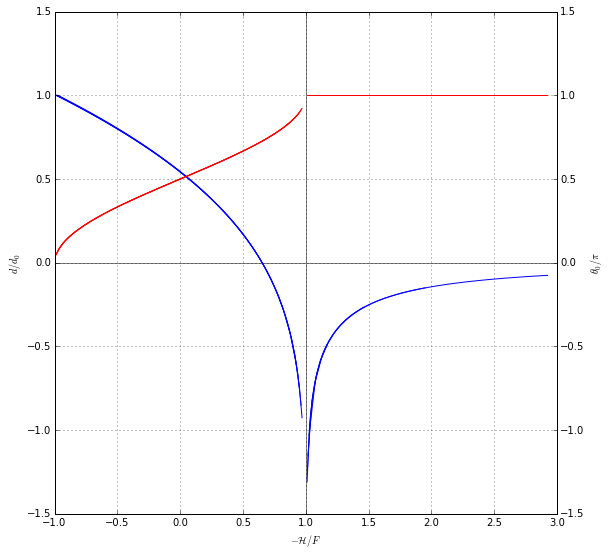

In [20]:
EI = 5000.   #kN m^2

fig, ax0 = plt.subplots(figsize=(9, 9))

ax0.grid()
ax0.axvline(x=1., color=(0.5,0.5,0.5))
ax0.axhline(color=(0.5,0.5,0.5))
ax0.set_xlabel(r'$-\mathcal{H}/F$')
ax0.set_ylim(-1.5, 1.5)
ax0.set_ylabel(r'$d/d_0$')


ax1 = ax0.twinx()
ax1.set_ylim(-1.5, 1.5)
ax1.set_ylabel(r'$\theta_0/\pi$')

F = np.arange(-5000., -1000., 1000.)    #kN

nEdges = 1000
nVertex = nEdges + 1

for k in range(len(F)):
    Hinf = np.arange(F[k]+50., -F[k]-50, 100.)   #kN m/m
    Hsup = np.arange(-F[k]+50, 5950., 100)

    Ni = np.zeros((len(Hinf), nVertex))
    Qi = np.zeros((len(Hinf), nVertex))
    Mi = np.zeros((len(Hinf), nVertex))
    th0i = np.zeros(len(Hinf))
    ph0i = []
    gammaInf = []
    for i in range(len(Hinf)):
        (th0i[i], Ni[i], Qi[i], Mi[i]) = getOrbitPoints(EI, Hinf[i], F[k], nVertex)
        (ph0, l, g) = computeElastica(th0i[i], Qi[i], Mi[i], nEdges, nVertex)
        gammaInf.append(g)
        ph0i.append(ph0)
    
    Ns = np.zeros((len(Hsup), nVertex))
    Qs = np.zeros((len(Hsup), nVertex))
    Ms = np.zeros((len(Hsup), nVertex))
    th0s = np.zeros(len(Hsup))
    ph0s = []
    gammaSup = []
    for i in range(len(Hsup)):
        (th0s[i], Ns[i], Qs[i], Ms[i]) = getOrbitPoints(EI, Hsup[i], F[k], nVertex)
        (ph0, l, g) = computeElastica(th0s[i], Qs[i], Ms[i], nEdges, nVertex)
        gammaSup.append(g)
        ph0s.append(ph0)
    
    distInf = np.zeros(len(Hinf))
    for i in range(len(Hinf)):
        distInf[i] = gammaInf[i][nVertex-1].real

    distSup = np.zeros(len(Hsup))
    for i in range(len(Hsup)):
        distSup[i] = gammaSup[i][nVertex-1].real
        
    ph0i = np.asarray(ph0i)
    ph0s = np.asarray(ph0s)
    
    #print(k)
    #print(ph0i)
    #print(ph0s)
        
    ax0.plot(-Hinf/F[k], distInf/gammaInf[0][nVertex-1].real, 'b')
    ax0.plot(-Hsup/F[k], distSup/gammaInf[0][nVertex-1].real, 'b')
    
    ax1.plot(-Hinf/F[k], ph0i/np.pi, 'r')
    ax1.plot(-Hsup/F[k], ph0s/np.pi, 'r')

## 3. Relation between rotation and transversal displacements

It is possible to establish a relation between rotations and transversal displacements based on the invariants of the deformation.  

Dividing the Hamiltonian by the total (signed) force, and considering that $M = F\,v$ we get
$$ \frac{\mathcal{H}}{F} = \frac{1}{2EI} M \frac{M}{F} + \frac{N}{F} = \frac{1}{2EI} F \,v^2 + \cos\theta$$

We recall that the critical length is given by the relation $d_0^2 = -\pi^2 EI / F \;\;\;\;(F < 0)$. Therefore
$$ \frac{v}{d_0} = \pm \frac{1}{\pi} \sqrt{2 \,\biggl( \cos\theta - \frac{\mathcal{H}}{F} \biggr)}$$

The deformation of the rod is symmetrical; therefore the mid section has no rotation ($\theta = 0$) and we can plot the relative pathe in the interval $-1 < -\mathcal{H}/F < 1$

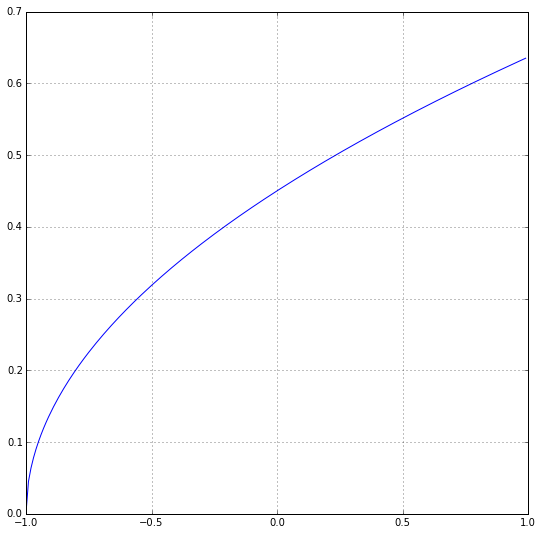

In [21]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.grid()

mHdivF = np.arange(-1., 1., 0.01)
vdivd0 = np.sqrt(2*(1 + mHdivF))/np.pi

ax.plot(mHdivF, vdivd0, 'b')